In [215]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [216]:
# importing dataset
temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [217]:
temp_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [218]:
temp_by_country.isnull().sum()
temp_by_country = temp_by_country.dropna(how='any' ,axis=0)
temp_by_country.shape

(544811, 4)

In [219]:
temp_by_country['dt'][0].split('-')[0]
def fetch_year(date):
    return date.split('-')[0]
temp_by_country['years']=temp_by_country['dt'].apply(fetch_year)
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [220]:
by_country=temp_by_country[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')
byx=pd.concat([by_country[20:23],by_country[72:75]],axis=0)
byx

,AverageTemperature
Country,
Åland,5.291383
Latvia,5.320545
Belarus,5.819288
Albania,12.610646
Italy,12.737122
France,12.772446


### Analysing Tunisia Climate Change

In [221]:
temp_Tunisia=temp_by_country.loc[(temp_by_country.Country == 'Tunisia')]
temp_Tunisia['dt'] = pd.to_datetime(temp_Tunisia['dt'])
temp_Tunisia.set_index('dt',inplace = True)
temp_Tunisia['AverageTemperature'].mean()

19.97059047314578

In [222]:
# Lưu dataframe temp_Tunisia vào file csv
temp_Tunisia.to_csv('temp_Tunisia.csv')

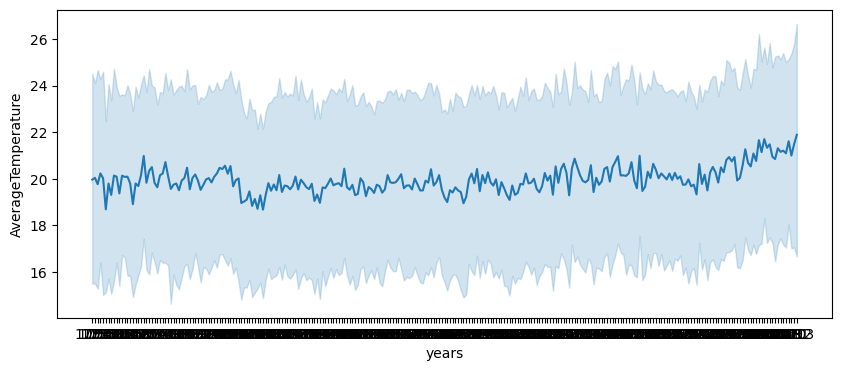

In [223]:
plt.figure(figsize=(10,4))
sns.lineplot(x = "years" , y = "AverageTemperature",data=temp_Tunisia)
plt.show()

In [224]:
temp_Tunisia['month']=temp_Tunisia.index.month
temp_Tunisia


,AverageTemperature,AverageTemperatureUncertainty,Country,years,month
dt,,,,,
1753-01-01,8.754,5.363,Tunisia,1753,1
1753-02-01,10.597,3.183,Tunisia,1753,2
1753-03-01,16.105,2.805,Tunisia,1753,3
1753-04-01,18.181,5.257,Tunisia,1753,4
1753-05-01,23.571,2.230,Tunisia,1753,5
...,...,...,...,...,...
2013-04-01,20.383,0.746,Tunisia,2013,4
2013-05-01,24.268,0.336,Tunisia,2013,5
2013-06-01,27.488,0.947,Tunisia,2013,6


In [225]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'
    
temp_Tunisia['season']=temp_Tunisia['month'].apply(get_season)
years=temp_Tunisia['years'].unique()
temp_Tunisia.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,years,month,season
dt,,,,,,
1753-01-01,8.754,5.363,Tunisia,1753,1,winter
1753-02-01,10.597,3.183,Tunisia,1753,2,winter
1753-03-01,16.105,2.805,Tunisia,1753,3,spring
1753-04-01,18.181,5.257,Tunisia,1753,4,spring
1753-05-01,23.571,2.230,Tunisia,1753,5,spring


In [226]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []
for year in years:
    current_df=temp_Tunisia[temp_Tunisia['years'] == year]
    spring_temp.append(current_df[current_df['season'] == 'spring']['AverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season'] == 'winter']['AverageTemperature'].mean())

Text(0, 0.5, 'Nhiệt Độ')

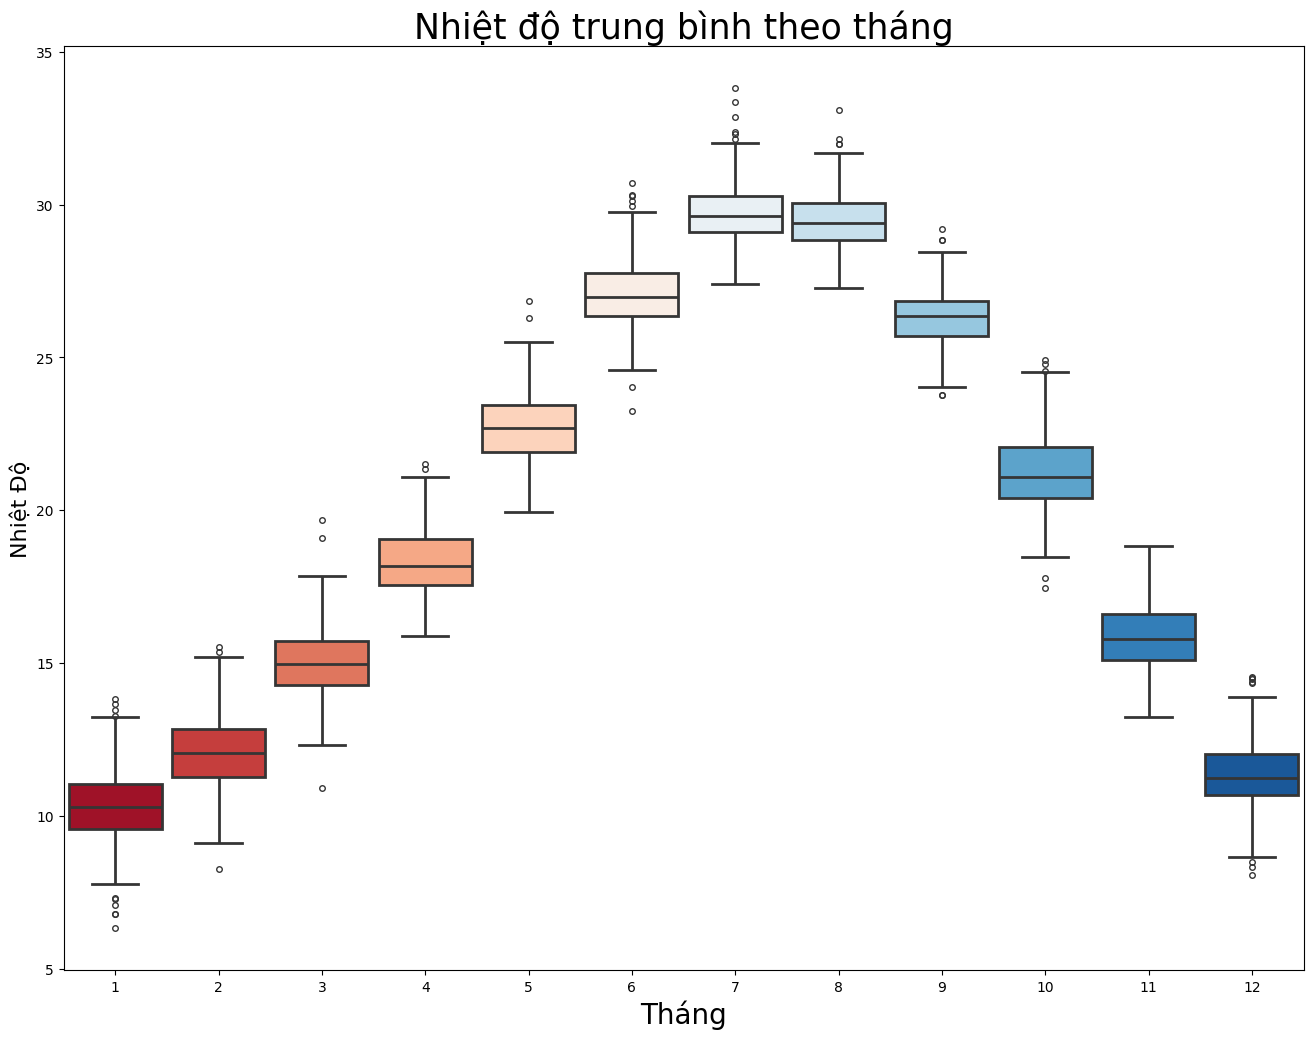

In [227]:
GlobalTemp=temp_Tunisia
GlobalTemp.loc[GlobalTemp['month']=='1','month'] = 'January'
GlobalTemp.loc[GlobalTemp['month']=='2','month'] = 'February'
GlobalTemp.loc[GlobalTemp['month']=='3','month'] = 'March'
GlobalTemp.loc[GlobalTemp['month']=='4','month'] = 'April'
GlobalTemp.loc[GlobalTemp['month']=='5','month'] = 'May'
GlobalTemp.loc[GlobalTemp['month']=='6','month'] = 'June'
GlobalTemp.loc[GlobalTemp['month']=='7','month'] = 'July'
GlobalTemp.loc[GlobalTemp['month']=='8','month'] = 'August'
GlobalTemp.loc[GlobalTemp['month']=='9','month'] = 'September'
GlobalTemp.loc[GlobalTemp['month']=='10','month'] = 'October'
GlobalTemp.loc[GlobalTemp['month']=='11','month'] = 'November'
GlobalTemp.loc[GlobalTemp['month']=='12','month'] = 'December'
year_month = GlobalTemp.groupby(by = ['years','month']).mean().reset_index()
# Figure size
plt.figure(figsize=(16,12))

# The plot
sns.boxplot(x = 'month', y = 'AverageTemperature', data = year_month, palette = "RdBu", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Nhiệt độ trung bình theo tháng', fontsize = 25)
plt.xlabel('Tháng', fontsize = 20)
plt.ylabel('Nhiệt Độ', fontsize = 16)

In [228]:
year_season = GlobalTemp.groupby(by = ['years','season']).mean().reset_index()
winter = year_season.loc[year_season['season'] == 'winter',:]
spring = year_season.loc[year_season['season'] == 'spring',:]
summer = year_season.loc[year_season['season'] == 'summer',:]
autumn = year_season.loc[year_season['season'] == 'autumn',:]

In [229]:
import plotly.graph_objects as go
fig2 = go.Figure()
for template in ["plotly_white"]:
    fig2.add_trace(go.Scatter(x=winter['years'], y=winter['AverageTemperature'],
                    mode='lines',
                    name='winter',
                    marker_color='#838B8B'))
    fig2.add_trace(go.Scatter(x=spring['years'], y=spring['AverageTemperature'],
                    mode='lines',
                    name='spring',
                    marker_color='#FFB5C5'))
    fig2.add_trace(go.Scatter(x=summer['years'], y=summer['AverageTemperature'],
                    mode='lines',
                    name='summer',
                    marker_color='#87CEFF'))
    fig2.add_trace(go.Scatter(x=autumn['years'], y=autumn['AverageTemperature'],
                    mode='lines',
                    name='autumn',
                    marker_color='#FF8000'))
    fig2.update_layout(
    height=800,
    xaxis_title="Năm",
    yaxis_title='Độ *C',
    title_text='Nhiệt độ trung bình theo mùa trong các năm',
    template=template)




fig2.show()

<AxesSubplot: xlabel='dt', ylabel='AverageTemperature'>

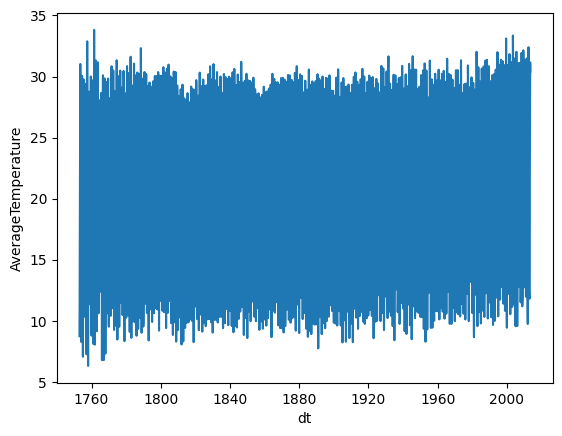

In [230]:
sns.lineplot(x=temp_Tunisia.index,y=temp_Tunisia['AverageTemperature'])


In [231]:
pivot = temp_Tunisia.pivot_table(values='AverageTemperature',index='month',columns='years')


Text(0.5, 80.7222222222222, 'Year')

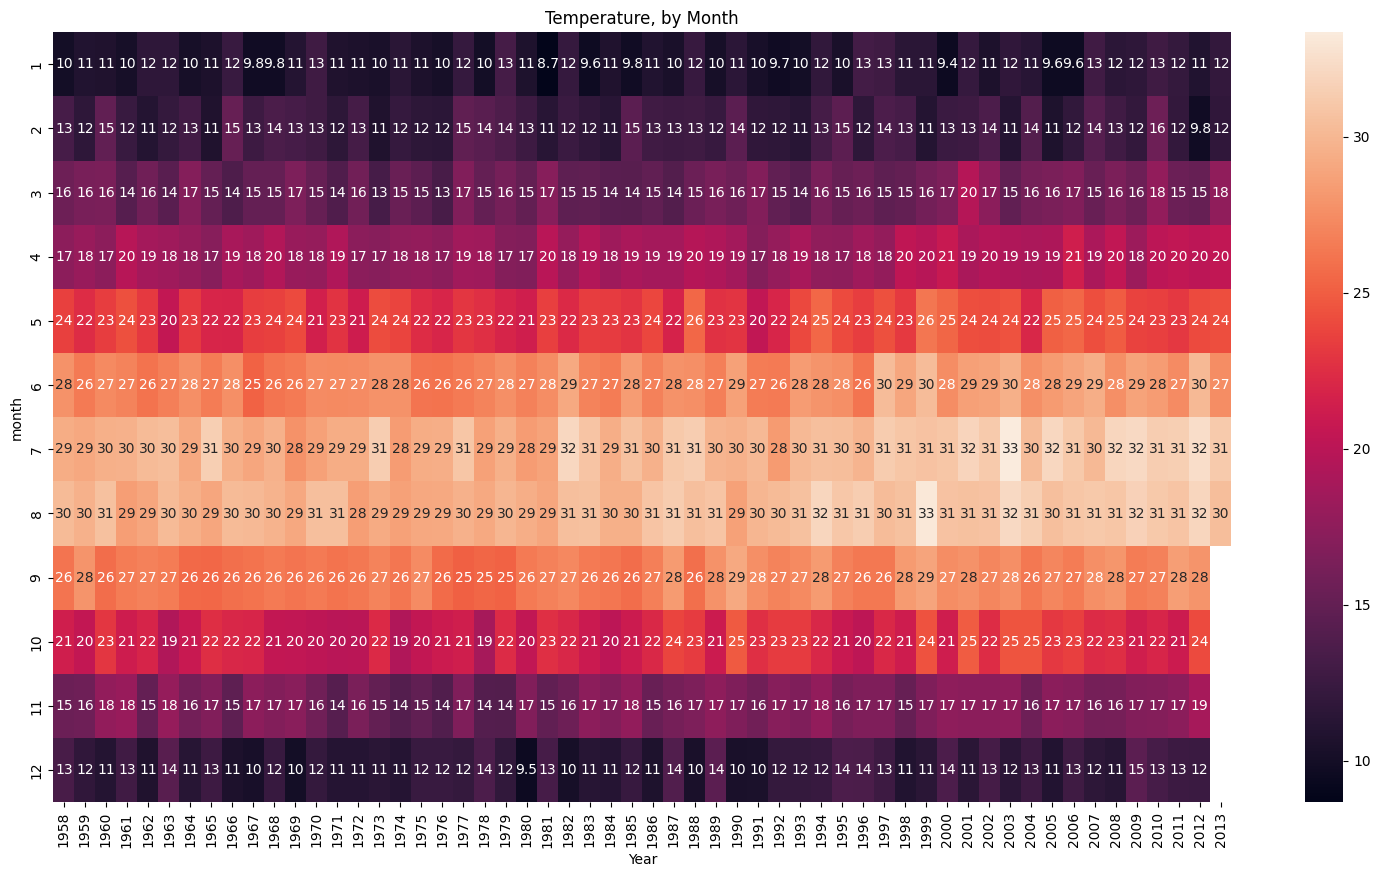

In [232]:
# Set the width and height of the figure
plt.figure(figsize=(19,10))

# Add title
plt.title("Temperature, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=pivot.loc[:,years[205:]], annot=True)

# Add label for horizontal axis
plt.xlabel("Year")

In [233]:
temp_Tunisia
# Lưu vào file mới
# temp_Tunisia.to_csv('temp_Tunisia_new.csv')

,AverageTemperature,AverageTemperatureUncertainty,Country,years,month,season
dt,,,,,,
1753-01-01,8.754,5.363,Tunisia,1753,1,winter
1753-02-01,10.597,3.183,Tunisia,1753,2,winter
1753-03-01,16.105,2.805,Tunisia,1753,3,spring
1753-04-01,18.181,5.257,Tunisia,1753,4,spring
1753-05-01,23.571,2.230,Tunisia,1753,5,spring
...,...,...,...,...,...,...
2013-04-01,20.383,0.746,Tunisia,2013,4,spring
2013-05-01,24.268,0.336,Tunisia,2013,5,spring
2013-06-01,27.488,0.947,Tunisia,2013,6,summer


### TRAINING MODEL

In [234]:
df = pd.read_csv('temp_Tunisia_new.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years,month,season
0,1753-01-01,8.754,5.363,Tunisia,1753,1,winter
1,1753-02-01,10.597,3.183,Tunisia,1753,2,winter
2,1753-03-01,16.105,2.805,Tunisia,1753,3,spring
3,1753-04-01,18.181,5.257,Tunisia,1753,4,spring
4,1753-05-01,23.571,2.230,Tunisia,1753,5,spring


In [235]:
# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

### SARIMA

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error



In [237]:
# Fit the ARIMA model on the training data (using SARIMAX for ARIMA functionality)
model = SARIMAX(train['AverageTemperature'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit()

# Print the model summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                 2502
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3557.681
Date:                            Sat, 25 May 2024   AIC                           7123.362
Time:                                    14:32:53   BIC                           7146.641
Sample:                                         0   HQIC                          7131.815
                                           - 2502                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2763      0.017     15.791      0.000       0.242       0.311
ma.L1         -0.9808      0.005   

In [238]:

# Make predictions on the test set
predictions = results.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean
predicted_ci = predictions.conf_int()

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics
mse_sarima = mean_squared_error(test['AverageTemperature'], predicted_mean)
mae_sarima = mean_absolute_error(test['AverageTemperature'], predicted_mean)
mape_sarima = mean_absolute_percentage_error(test['AverageTemperature'], predicted_mean)

print(f'Mean Squared Error: {mse_sarima}')
print(f'Mean Absolute Error: {mae_sarima}')
print(f'Mean Absolute Percentage Esrror: {mape_sarima:.2f}%')

'''
Sai số bình phương trung bình (MSE):

Giá trị: 1.39
Diễn giải: MSE đo lường sự chênh lệch trung bình bình phương giữa các giá trị thực tế quan sát được và giá trị dự đoán của mô hình. MSE càng thấp càng tốt vì nó cho thấy dự đoán của mô hình gần với giá trị thực tế hơn. Trong trường hợp của bạn, MSE là 1.39, cho thấy dự đoán của mô hình khá gần với nhiệt độ thực tế.
Sai số trung bình tuyệt đối (MAE):

Giá trị: 0.95
Diễn giải: MAE đo lường độ lớn trung bình của các sai số trong tập hợp dự đoán, không xét đến hướng (tức là nó lấy giá trị tuyệt đối của sự chênh lệch). MAE càng thấp càng tốt. Ở đây, MAE là 0.95 nghĩa là trung bình, dự đoán của mô hình chênh lệch dưới 1 độ C, khá chính xác đối với dữ liệu nhiệt độ.
Sai số phần trăm trung bình tuyệt đối (MAPE):

Giá trị: 5.28%
Diễn giải: MAPE đo lường kích thước của sai số dưới dạng phần trăm. Nó được tính bằng sai số phần trăm tuyệt đối trung bình cho mỗi điểm dự báo. MAPE là 5.28% nghĩa là sai số trung bình khoảng 5.28% so với giá trị nhiệt độ thực tế. Thông thường, MAPE dưới 10% được coi là rất tốt cho hầu hết các ứng dụng dự báo.
'''


Mean Squared Error: 1.3889055899032678
Mean Absolute Error: 0.9537150737470546
Mean Absolute Percentage Esrror: 5.28%


'\nSai số bình phương trung bình (MSE):\n\nGiá trị: 1.39\nDiễn giải: MSE đo lường sự chênh lệch trung bình bình phương giữa các giá trị thực tế quan sát được và giá trị dự đoán của mô hình. MSE càng thấp càng tốt vì nó cho thấy dự đoán của mô hình gần với giá trị thực tế hơn. Trong trường hợp của bạn, MSE là 1.39, cho thấy dự đoán của mô hình khá gần với nhiệt độ thực tế.\nSai số trung bình tuyệt đối (MAE):\n\nGiá trị: 0.95\nDiễn giải: MAE đo lường độ lớn trung bình của các sai số trong tập hợp dự đoán, không xét đến hướng (tức là nó lấy giá trị tuyệt đối của sự chênh lệch). MAE càng thấp càng tốt. Ở đây, MAE là 0.95 nghĩa là trung bình, dự đoán của mô hình chênh lệch dưới 1 độ C, khá chính xác đối với dữ liệu nhiệt độ.\nSai số phần trăm trung bình tuyệt đối (MAPE):\n\nGiá trị: 5.28%\nDiễn giải: MAPE đo lường kích thước của sai số dưới dạng phần trăm. Nó được tính bằng sai số phần trăm tuyệt đối trung bình cho mỗi điểm dự báo. MAPE là 5.28% nghĩa là sai số trung bình khoảng 5.28% so vớ

In [239]:
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Tunisia Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(math.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")


Results of Dickey-Fuller Test:
Test Statistic                   -5.9301
p-value                           0.0000
Lags Used                        26.0000
Number of Observations Used    2475.0000
Critical Value (1%)              -3.4330
Critical Value (5%)              -2.8627
Critical Value (10%)             -2.5674
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


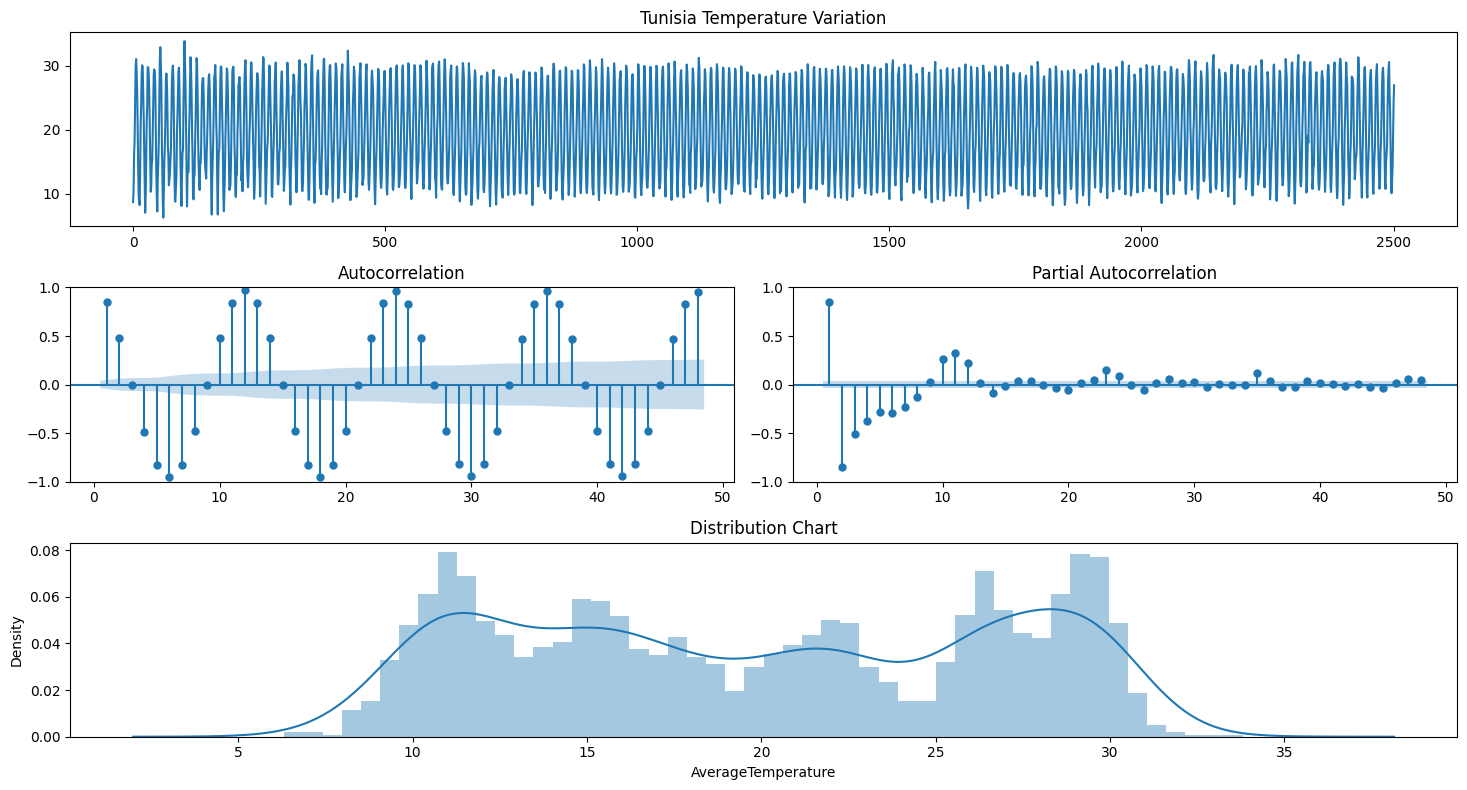

In [240]:
check_stationarity(train['AverageTemperature'])


### PHROPHET

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [242]:
# Đổi tên các cột để phù hợp với định dạng yêu cầu của Prophet
df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'}, inplace=True)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [243]:
# Khởi tạo mô hình Prophet với các tham số cần thiết
model = Prophet(
    seasonality_mode='multiplicative',  # Chế độ mùa vụ
    seasonality_prior_scale=10.0,       # Điều chỉnh độ mượt mà của mùa vụ
    yearly_seasonality=True,            # Bật mùa vụ hàng năm
    weekly_seasonality=False,           # Tắt mùa vụ hàng tuần
    daily_seasonality=False,            # Tắt mùa vụ hàng ngày
    interval_width=0.95                 # Độ rộng khoảng tin cậy
)
model.fit(train)

14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing


In [244]:
# Thực hiện dự báo trên tập kiểm tra
future = model.make_future_dataframe(periods=len(test), freq='MS')
forecast = model.predict(future)

# Lấy các giá trị dự báo cho tập kiểm tra
predicted = forecast['yhat'].iloc[-len(test):].values


In [245]:
# Tính các chỉ số đánh giá
mse_prophet = mean_squared_error(test['y'], predicted)
mae_prophet = mean_absolute_error(test['y'], predicted)
mape_prophet = mean_absolute_percentage_error(test['y'], predicted)

print(f'Mean Squared Error: {mse_prophet}')
print(f'Mean Absolute Error: {mae_prophet}')
print(f'Mean Absolute Percentage Error: {mape_prophet:.2f}%')

Mean Squared Error: 1.3380273207427635
Mean Absolute Error: 0.926622313026781
Mean Absolute Percentage Error: 5.20%


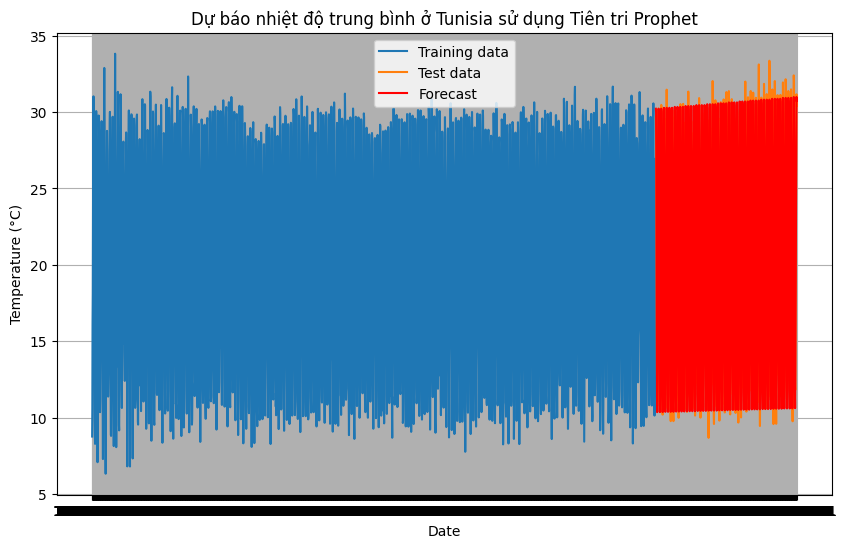

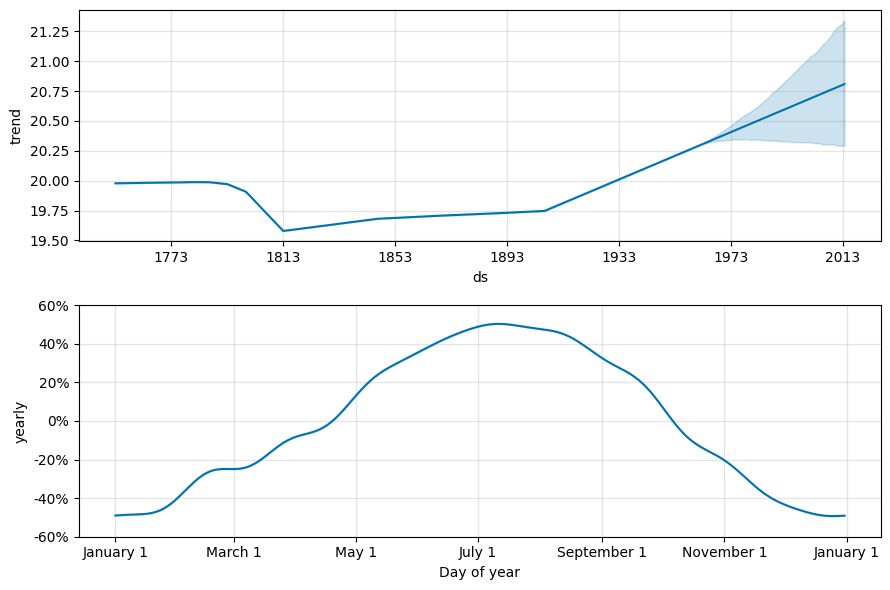

In [246]:
# Hiển thị biểu đồ dự báo
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training data')
plt.plot(test['ds'], test['y'], label='Test data')
plt.plot(test['ds'], predicted, label='Forecast', color='red')
plt.title('Dự báo nhiệt độ trung bình ở Tunisia sử dụng Tiên tri Prophet')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Hiển thị các thành phần của dự báo (xu hướng, mùa vụ, ...)
model.plot_components(forecast)
plt.show()

### LSTM

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

df = pd.read_csv('temp_Tunisia_new.csv')

# Hàm chuẩn bị dữ liệu cho mô hình LSTM
def prepare_data(data, look_back):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Chọn cột 'AverageTemperature' và chuyển đổi thành numpy array
data = df['AverageTemperature'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu sang khoảng [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Số lượng bước quay lại (look back) cho mô hình LSTM
look_back = 12  # Ví dụ: Sử dụng 12 tháng trước để dự báo tháng hiện tại

# Chuẩn bị dữ liệu cho mô hình LSTM
X, Y = prepare_data(data_normalized, look_back)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape lại dữ liệu để phù hợp với đầu vào của mạng LSTM (số mẫu, số bước thời gian, số đặc trưng)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Dự báo giá trị tiếp theo
predicted = model.predict(X_test)

# Đưa dự báo về dạng ban đầu
predicted = scaler.inverse_transform(predicted)
Y_test = scaler.inverse_transform([Y_test])



Epoch 1/100
78/78 - 8s - 106ms/step - loss: 0.0851 - val_loss: 0.0581
Epoch 2/100
78/78 - 2s - 22ms/step - loss: 0.0294 - val_loss: 0.0045
Epoch 3/100
78/78 - 2s - 23ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 4/100
78/78 - 2s - 22ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 5/100
78/78 - 2s - 21ms/step - loss: 0.0056 - val_loss: 0.0137
Epoch 6/100
78/78 - 2s - 22ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 7/100
78/78 - 2s - 22ms/step - loss: 0.0046 - val_loss: 0.0084
Epoch 8/100
78/78 - 2s - 22ms/step - loss: 0.0045 - val_loss: 0.0075
Epoch 9/100
78/78 - 2s - 22ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 10/100
78/78 - 2s - 22ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 11/100
78/78 - 2s - 21ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 12/100
78/78 - 2s - 21ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 13/100
78/78 - 2s - 22ms/step - loss: 0.0039 - val_loss: 0.0052
Epoch 14/100
78/78 - 2s - 21ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 15/100
78/78 - 2s - 22

In [248]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_lstm = mean_squared_error(Y_test[0], predicted[:, 0])

mae_lstm = mean_absolute_error(Y_test[0], predicted[:, 0])

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lstm = mean_absolute_percentage_error(Y_test[0], predicted[:, 0])

print(f'Mean Squared Error: {mse_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Mean Absolute Percentage Error: {mape_lstm:.2f}%')




Mean Squared Error: 1.9190578927216
Mean Absolute Error: 1.1114529901895769
Mean Absolute Percentage Error: 5.93%


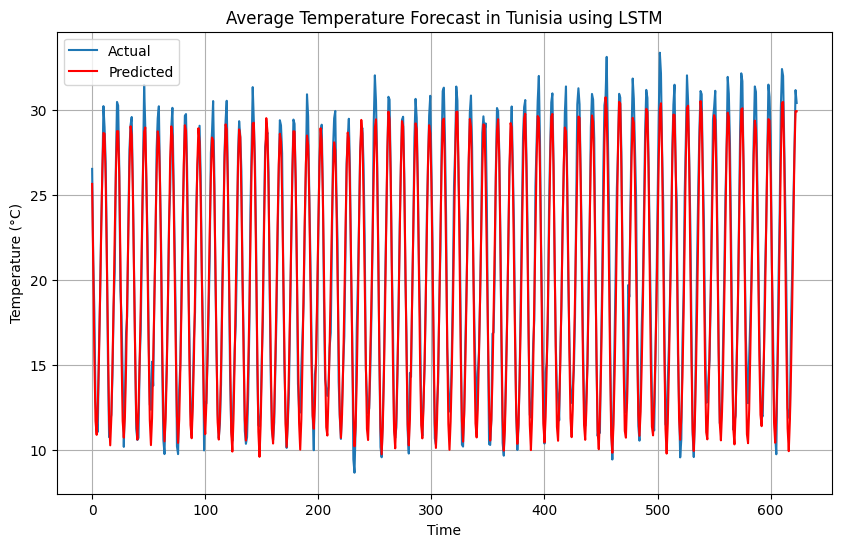

In [249]:
# Hiển thị biểu đồ kết quả
plt.figure(figsize=(10, 6))
plt.plot(Y_test[0], label='Actual')
plt.plot(predicted, label='Predicted', color='red')
plt.title('Average Temperature Forecast in Tunisia using LSTM')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

### ĐÁNH GIÁ MÔ HÌNH

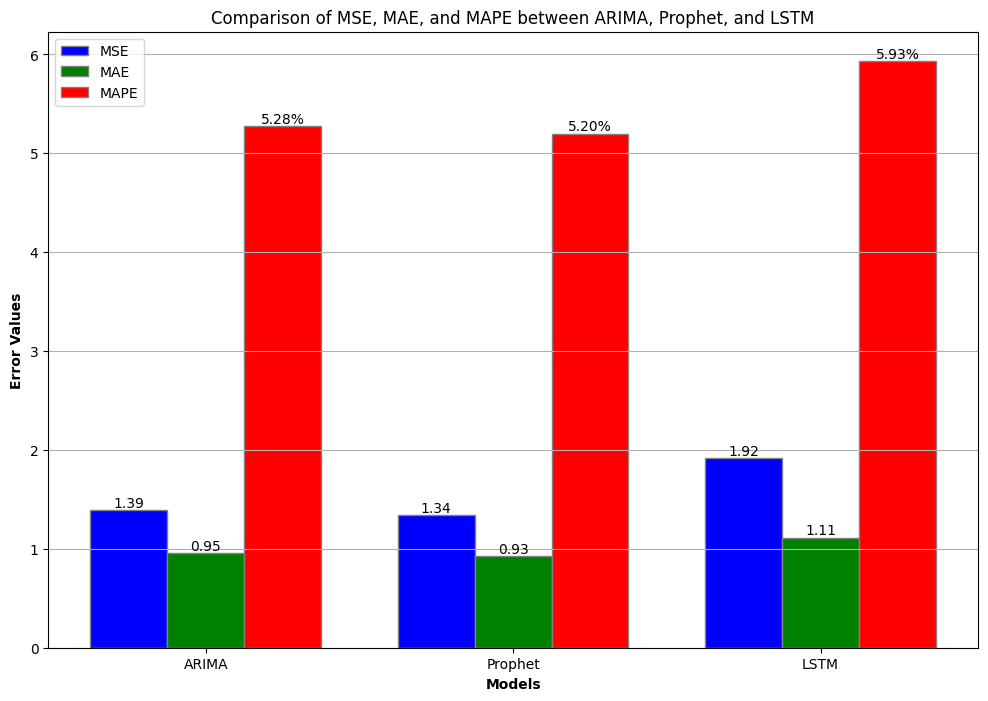

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


# Các nhãn cho các mô hình
models = ['ARIMA', 'Prophet', 'LSTM']

# Các giá trị MSE, MAE và MAPE cho các mô hình
mse_values = [mse_sarima, mse_prophet, mse_lstm]
mae_values = [mae_sarima, mae_prophet, mae_lstm]
mape_values = [mape_sarima, mape_prophet, mape_lstm]

# Đặt vị trí cho các nhóm cột
bar_width = 0.25
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 8))

# Biểu đồ MSE
bars1 = plt.bar(r1, mse_values, color='b', width=bar_width, edgecolor='grey', label='MSE')

# Biểu đồ MAE
bars2 = plt.bar(r2, mae_values, color='g', width=bar_width, edgecolor='grey', label='MAE')

# Biểu đồ MAPE
bars3 = plt.bar(r3, mape_values, color='r', width=bar_width, edgecolor='grey', label='MAPE')

# Thêm thông tin biểu đồ
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Error Values', fontweight='bold')
plt.title('Comparison of MSE, MAE, and MAPE between ARIMA, Prophet, and LSTM')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()
plt.grid(axis='y')

# Thêm giá trị phía trên mỗi cột
def add_value_labels(bars, is_percentage=False):
    for bar in bars:
        height = bar.get_height()
        if is_percentage:
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3, is_percentage=True)

# Hiển thị biểu đồ
plt.show()
